In [2]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

#### Deklarasi Path Dataset

In [3]:
img_path = 'dataset'

#### Buat ImageDataGenerator

In [4]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)


#### Split & Load Image dari path dengan ImageDataGenerator (train & val)

In [5]:
train = train_gen.flow_from_directory(
    img_path, 
    target_size=[100,100], 
    batch_size=32, 
    class_mode='categorical', 
    subset='training')
val = train_gen.flow_from_directory(
    img_path,
    target_size=[100,100], 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


#### Buat Model Sequential

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(100,100,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

#### Siapkan callbacks EarlyStopping dengan memantau val accuracy

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(
    'val_accuracy', patience = 2
)

#### Compile Model

In [37]:
model.compile(
    optimizer= 'adam',
    loss = 'categorical_crossentropy', 
    metrics= ['accuracy']
)

#### Fit Model dengan data train yg sudah di split

In [38]:
hasil = model.fit(train, validation_data=val, epochs=10, callbacks=early_stop)

Epoch 1/10
375/375 [==============================] - 138s 358ms/step - loss: 0.4274 - accuracy: 0.8274 - val_loss: 0.2197 - val_accuracy: 0.9183
Epoch 2/10
375/375 [==============================] - 129s 343ms/step - loss: 0.2039 - accuracy: 0.9258 - val_loss: 0.2091 - val_accuracy: 0.9187
Epoch 3/10
375/375 [==============================] - 134s 358ms/step - loss: 0.1459 - accuracy: 0.9492 - val_loss: 0.1422 - val_accuracy: 0.9473
Epoch 4/10
375/375 [==============================] - 127s 339ms/step - loss: 0.1177 - accuracy: 0.9592 - val_loss: 0.1875 - val_accuracy: 0.9333
Epoch 5/10
375/375 [==============================] - 208s 550ms/step - loss: 0.1116 - accuracy: 0.9597 - val_loss: 0.1416 - val_accuracy: 0.9440


#### Tampilkan perbandingan accuracy dan loss untuk train dan val

In [24]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


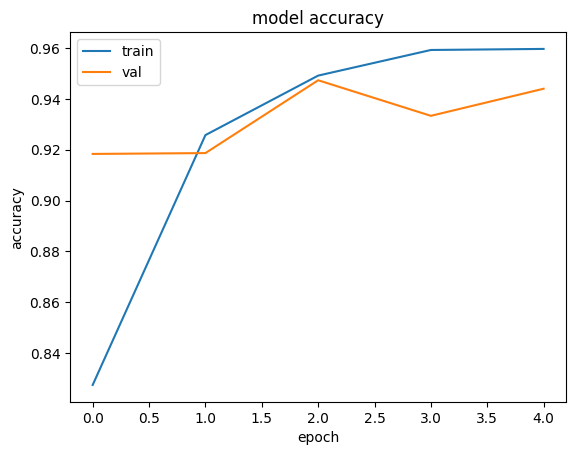

In [40]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

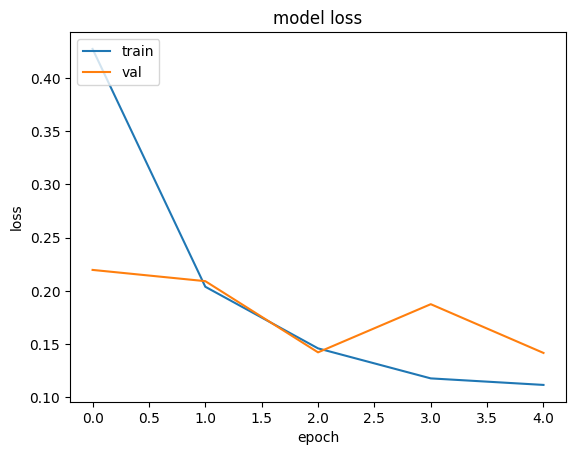

In [41]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Evaluasi model dengan data val

In [42]:
skor = model.evaluate(val)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], skor[1]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[0], skor[0]*100))

94/94 [==============================] - 14s 140ms/step - loss: 0.1380 - accuracy: 0.9483
evaluate accuracy: 94.83%
evaluate loss: 13.80%


#### Evaluasi model dengan data dalam test_data

In [48]:
test_gen = ImageDataGenerator(
    rescale=1./255,
)
test = test_gen.flow_from_directory(
    'test_data', 
    target_size=[100,100], 
    class_mode = 'categorical'
)

Found 219 images belonging to 3 classes.


In [49]:
skor = model.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], skor[1]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[0], skor[0]*100))

7/7 [==============================] - 1s 132ms/step - loss: 0.0713 - accuracy: 0.9635
evaluate accuracy: 96.35%
evaluate loss: 7.13%
